In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('TG_STAID002759.txt', skiprows=19)

In [3]:
df.head()

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [4]:
df.columns= ['id','date','temp','quality']

In [5]:
df.head()

,id,date,temp,quality
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [6]:
df['id'].nunique()

1

In [7]:
df['id'].value_counts()

111448    25568
Name: id, dtype: int64

In [8]:
df.drop(['id'],axis=1, inplace=True)

In [9]:
df.head()

,date,temp,quality
0,19510101,-40,0
1,19510102,-14,0
2,19510103,-12,0
3,19510104,4,0
4,19510105,25,0


In [10]:
df['quality'].value_counts()

0    25568
Name: quality, dtype: int64

In [11]:
df.drop(['quality'],axis=1, inplace=True)

In [12]:
df.head()

,date,temp
0,19510101,-40
1,19510102,-14
2,19510103,-12
3,19510104,4
4,19510105,25


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    25568 non-null  int64
 1   temp    25568 non-null  int64
dtypes: int64(2)
memory usage: 399.6 KB


In [14]:
df['date']=df['date'].astype(str)

In [15]:
df['date']=pd.to_datetime(df['date'])

In [16]:
df.head()

,date,temp
0,1951-01-01,-40
1,1951-01-02,-14
2,1951-01-03,-12
3,1951-01-04,4
4,1951-01-05,25


In [17]:
df=df.set_index('date')

In [20]:
df.head()

,temp
date,
1951-01-01,-40
1951-01-02,-14
1951-01-03,-12
1951-01-04,4
1951-01-05,25


In [25]:
#subset
df_80_82 =df.loc['1980':'1982']

In [26]:
df_80_82.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [31]:
df['temp']=df['temp']*0.1

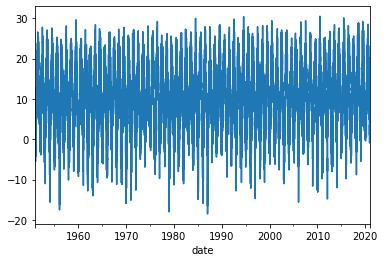

In [32]:
df['temp'].plot()

In [33]:
df_80_82['temp']=df_80_82['temp']*0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


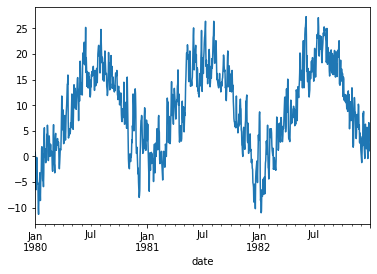

In [34]:
df_80_82['temp'].plot()

In [41]:
df_80_82.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [35]:
df_train=df.loc['1979':'2019']

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14975 entries, 1979-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    14975 non-null  float64
dtypes: float64(1)
memory usage: 234.0 KB


In [37]:
df_train.to_csv('temp_train.csv')

In [38]:
df_test=df.loc['2020']

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [39]:
df_test.to_csv('temp_test.csv')

In [46]:
df_80_82_increase_2=pd.DataFrame(df_80_82['temp']+2)

In [47]:
df_80_82_increase_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [48]:
df_80_82_increase_2.head()

,temp
date,
1980-01-01,2.8
1980-01-02,1.5
1980-01-03,-1.5
1980-01-04,-4.5
1980-01-05,-0.3


In [50]:
df_80_82.head()

,temp
date,
1980-01-01,0.8
1980-01-02,-0.5
1980-01-03,-3.5
1980-01-04,-6.5
1980-01-05,-2.3


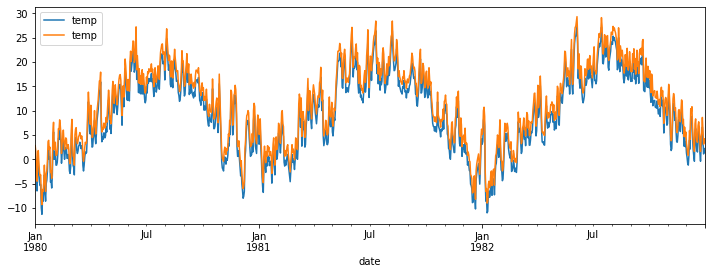

In [55]:
fig, ax = plt.subplots(figsize=(12, 4))
df_80_82.plot(ax=ax)
df_80_82_increase_2.plot(ax=ax)


In [70]:
df_75=df['1975']
df_80=df['1980']
df_85=df['1985']
df_90=df['1990']
df_95=df['1995']
df_2000=df['2000']
df_2005=df['2005']
df_2010=df['2010']
df_2015=df['2015']

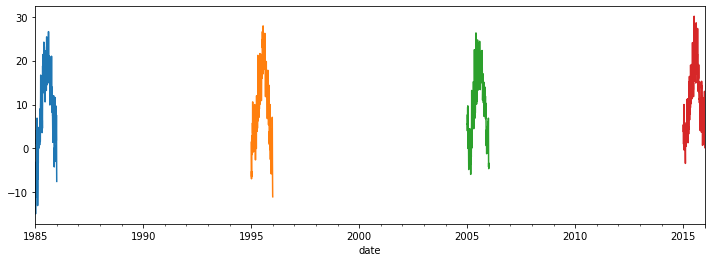

In [71]:
fig, ax = plt.subplots(figsize=(12, 4))
df_85['temp'].plot(ax=ax)
df_95['temp'].plot(ax=ax)
df_2005['temp'].plot(ax=ax)
df_2015['temp'].plot(ax=ax)

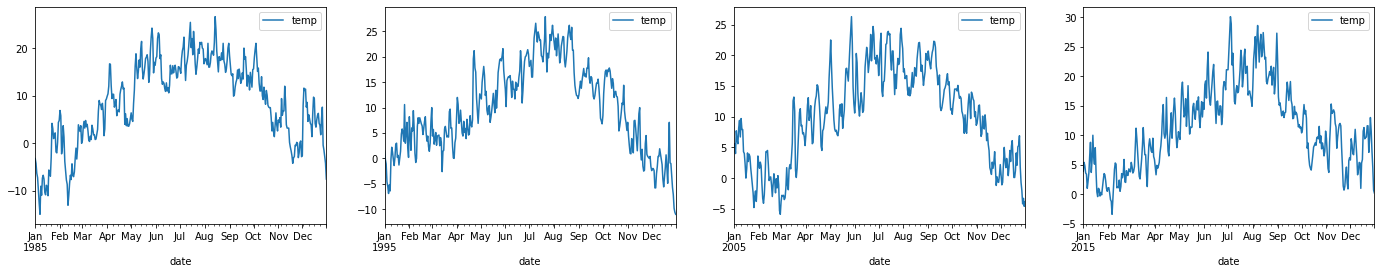

In [79]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1 , ncols=4, figsize=(24,4))
df_85.plot(ax=ax0)
df_95.plot(ax=ax1)
df_2005.plot(ax=ax2)
df_2015.plot(ax=ax3)

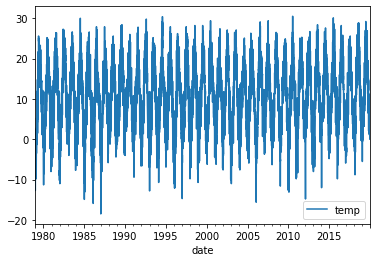

In [83]:
df_train.plot()

In [84]:
df_train['timestep'] = list(range(len(df_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_train.head()

,temp,timestep
date,,
1979-01-01,-11.9,0
1979-01-02,-9.3,1
1979-01-03,-7.8,2
1979-01-04,-9.6,3
1979-01-05,-9.9,4


In [90]:
df_train.reset_index(inplace=True)

In [91]:
df_train.head()

,date,temp,timestep
0,1979-01-01,-11.9,0
1,1979-01-02,-9.3,1
2,1979-01-03,-7.8,2
3,1979-01-04,-9.6,3
4,1979-01-05,-9.9,4


In [101]:
X=df_train[['timestep']]
y=df_train[['temp']]

In [102]:
X

,timestep
0,0
1,1
2,2
3,3
4,4
...,...
14970,14970
14971,14971
14972,14972
14973,14973


In [103]:
model = LinearRegression()
reg=model.fit(X,y)

In [104]:
reg.score(X, y)

0.005452814262220662

In [107]:
print('coefficient is: ',reg.coef_)
print('intercept is: ',reg.intercept_)

coefficient is:  [[0.00013491]]
intercept is:  [9.11914954]
